# Dataset - understanding and visualisation

Some basic analysis and visualisation of the data to support further exporation and modelling.

## Libraries

In [10]:
import numpy as np
import pandas as pd

from heatmap import heatmap, corrplot

from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import nltk

## Datasets

In [11]:
train_features = pd.read_csv("Data/train_features.csv")
test_features = pd.read_csv("Data/test_features.csv")
train_targets = pd.read_csv("Data/train_targets_scored.csv")

## Experimental conditions

### Data distribution

In [531]:
# Training dataset experimental conditions dataframe
train_conditions_df = train_features.iloc[:,1:4]

# Sunburst plot
fig = px.sunburst(
    train_conditions_df,
    path=['cp_type', 'cp_time', 'cp_dose'])

# Layout
fig.update_layout(
    autosize=False,
    width=300,
    height=350,
    showlegend=False,     
    margin={'l': 20, 'r': 20, 't':  20, 'b': 40},
    title_text = "Training dataset",
    title_x = 0.5,
    title_y = 0.02,
    template="simple_white")

#HTML export
fig.write_html("ec_train.html")

In [532]:
#Testing dataset experimental conditions dataframe
test_conditions_df = test_features.iloc[:,1:4]

# Sunburst plot
fig = px.sunburst(
    test_conditions_df,
    path=['cp_type', 'cp_time', 'cp_dose'])

# Layout
fig.update_layout(
    autosize=False,
    width=300,
    height=350,
    showlegend=False,     
    margin={'l': 20, 'r': 20, 't':  20, 'b': 40},
    title_text = "Testing dataset",
    title_x = 0.5,
    title_y = 0.02,
    template="simple_white")

#HTML export
fig.write_html("ec_test.html")

## Gene expressions

### Data distribution

In [533]:
# List of gene expressions
gene_expressions = []

for i in range(len(train_features)):
    for j in list(train_features.iloc[i, 4:776]):
        gene_expressions.append(j)

In [534]:
# Decriptive statistics
pd.DataFrame(gene_expressions).describe()

,0
count,1.838441e+07
mean,9.009573e-03
std,1.236087e+00
min,-1.000000e+01
25%,-4.920000e-01
50%,0.000000e+00
75%,5.072000e-01
max,1.000000e+01


In [535]:
fig = go.Figure() 

# Histogram trace
fig.add_trace(
    go.Histogram(
        x=gene_expressions[:1000000], 
        nbinsx = 150))

# Layout
fig.update_layout(
    autosize=False,
    width=400,
    height=300,
    showlegend=False,     
    margin={'l': 20, 'r': 20, 't':  20, 'b': 20},
    template="simple_white",
    xaxis_title = "Gene expression",
    yaxis_title = "Count")

#HTML export
fig.write_html("gene_expressions.html")

### Cross-correlations

In [8]:
# Gene expressions dataframe
gene_expressions_df = train_features.iloc[:,4:776]

# Cross-correlations calculation (lower diagonal)
ge_correlations = pd.DataFrame(np.tril(gene_expressions_df.corr(), -1))

# List of gene expression correlations
ge_correlations_list = []

for i in range(len(ge_correlations)):
    for j in list(ge_correlations.iloc[i,]): 
        ge_correlations_list.append(j)

ge_correlations_list = list(filter(lambda a: a != 0, ge_correlations_list)) # Filter out zeros from list (from upper diagonal populated with zeros)

# Calculating number of significant correlations (Pearson two-tailed probability with alpha = 0.05 and 23814 degrees of freedom is 0.01271)
ge_correlations_list_significant = list(filter(lambda a: a > 0.01271 or a < -0.01271, ge_correlations_list)) 

print(f"Number of significant correlations: {len(ge_correlations_list_significant)}")
print(f"Percent significant correlations: {round(len(ge_correlations_list_significant)/len(ge_correlations_list)*100, 1)}")

# Calculating the number of correlations above with a correlation coefficient (CC) above 0.2, 0.4, 0.6 and 0.8
ge_correlations_2 = list(filter(lambda a: a < 0.2 and a > -0.2, ge_correlations_list)) 
ge_correlations_4 = list(filter(lambda a: a < 0.4 and a > -0.4, ge_correlations_list)) 
ge_correlations_6 = list(filter(lambda a: a < 0.6 and a > -0.6, ge_correlations_list)) 
ge_correlations_8 = list(filter(lambda a: a < 0.8 and a > -0.8, ge_correlations_list)) 


print(f"Number of correlations (CC < 0.2): {len(ge_correlations_2)}")
print(f"Percent of correlations (CC < 0.2): {round(len(ge_correlations_2)/len(ge_correlations_list)*100, 1)}")

print(f"Number of correlations (0.2 < CC < 0.4): {len(ge_correlations_4) - len(ge_correlations_2)}")
print(f"Percent of correlations (0.2 < CC < 0.4): {round((len(ge_correlations_4)- len(ge_correlations_2))/len(ge_correlations_list)*100, 1)}")

print(f"Number of correlations (0.4 < CC < 0.6): {len(ge_correlations_6) - len(ge_correlations_4)}")
print(f"Percent of correlations (0.4 < CC < 0.6): {round((len(ge_correlations_6)- len(ge_correlations_4))/len(ge_correlations_list)*100, 1)}")

print(f"Number of correlations (0.6 < CC < 0.8): {len(ge_correlations_8) - len(ge_correlations_6)}")
print(f"Percent of correlations (0.6 < CC < 0.8): {round((len(ge_correlations_8)- len(ge_correlations_6))/len(ge_correlations_list)*100, 1)}")

Number of significant correlations: 281937
Percent significant correlations: 94.7
Number of correlations (CC < 0.2): 187412
Percent of correlations (CC < 0.2): 63.0
Number of correlations (0.2 < CC < 0.4): 78307
Percent of correlations (0.2 < CC < 0.4): 26.3
Number of correlations (0.4 < CC < 0.6): 27782
Percent of correlations (0.4 < CC < 0.6): 9.3
Number of correlations (0.6 < CC < 0.8): 4079
Percent of correlations (0.6 < CC < 0.8): 1.4


In [542]:
fig = go.Figure() 

# Histogram trace
fig.add_trace(
    go.Histogram(
        x=ge_correlations_list, 
        nbinsx = 150))

# Layout
fig.update_layout(autosize=False,
    width=400,
    height=300,
    showlegend=False,     
    margin={'l': 20, 'r': 20, 't':  20, 'b': 20},
    template="simple_white",
    xaxis_title = "Correlation coefficient",
    yaxis_title = "Count",
    xaxis_range = [-1,1])
    
#HTML export
fig.write_html("ge_correlations.html")

## Cell viability

### Data distribution

In [543]:
# List of cell viabilities
cell_viabilities = []

for i in range(len(train_features)):
    for j in list(train_features.iloc[i,776:876]): # Cell vibility data only
        cell_viabilities.append(j)

In [544]:
# Decriptive statistics
pd.DataFrame(cell_viabilities).describe()

,0
count,2.381400e+06
mean,-4.322313e-01
std,1.904587e+00
min,-1.000000e+01
25%,-5.614000e-01
50%,-5.400000e-03
75%,4.568000e-01
max,6.412000e+00


In [545]:
fig = go.Figure() 

# Histogram trace
fig.add_trace(
    go.Histogram(
        x=cell_viabilities, 
        nbinsx = 150))

# Layout
fig.update_layout(autosize=False,
    width=400,
    height=300,
    showlegend=False,     
    margin={'l': 20, 'r': 20, 't':  20, 'b': 20},
    template="simple_white",
    xaxis_title = "Cell viability",
    yaxis_title = "Count",
    xaxis_range = [-10,10])

#HTML export
fig.write_html("cell_viabilities.html")

### Cross-correlations

In [546]:
# Cell viability dataframe
cell_viability_df = train_features.iloc[:,776:876]

# Cross-correlations calculation (lower diagonal)
cv_correlations = pd.DataFrame(np.tril(cell_viability_df.corr(), -1))

# List of cell viabilities correlations
cv_correlations_list = []
for i in range(len(cv_correlations)):
    for j in list(cv_correlations.iloc[i,]): 
        cv_correlations_list.append(j)

cv_correlations_list = list(filter(lambda a: a != 0, cv_correlations_list)) # Filter out zeros from list (from upper diagonal populated with zeros)

# Calculating number of significant correlations (Pearson two-tailed probability)
cv_correlations_list_significant = list(filter(lambda a: a > 0.01271 or a < -0.01271, cv_correlations_list)) 
print(f"Number of significant correlations: {len(cv_correlations_list_significant)}")
print(f"Percent significant correlations: {len(cv_correlations_list_significant)/len(cv_correlations_list)*100}")

# Range of correlation values
print(f"Range of correlation values: {min(cv_correlations_list)} - {max(cv_correlations_list)}")

Number of significant correlations: 4950
Percent significant correlations: 100.0
Range of correlation values: 0.612083562348887 - 0.9246193066599003


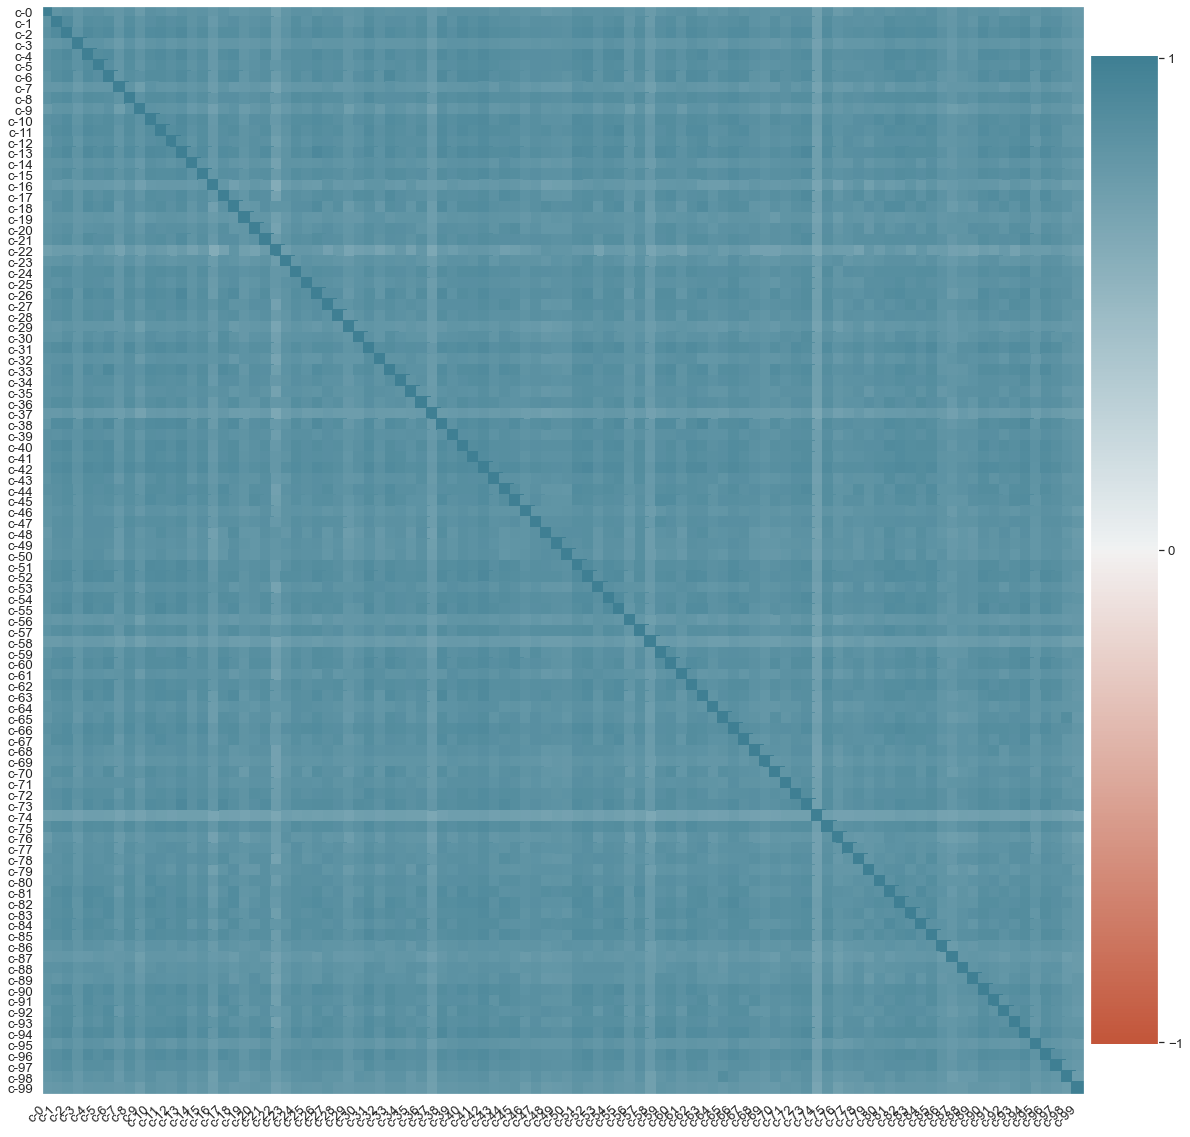

In [547]:
plt.figure(figsize=(20,20))
corrplot(
    cell_viability_df.corr(), 
    size_scale=200)

plt.savefig("cv_corr_matrix.png")

## Mechanism of Action

### Number of mechanisms of action per treatment

In [145]:
# Add treatment type and sum of MoA to existing MoA dataframe
train_targets['cp_type'] = None
train_targets['moa_sum'] = 0

for i in range(len(train_targets)):
    cp_type = train_features.loc[train_features["sig_id"] == train_targets["sig_id"][i], 'cp_type']
    train_targets['cp_type'][i] = cp_type[i]
    train_targets["moa_sum"][i] = train_targets.iloc[i,1:207].sum()

In [401]:
# Histogram + marginal violin plot
fig = px.histogram(
    train_targets, 
    x = "moa_sum", 
    color="cp_type", 
    marginal="violin",
    template="simple_white")

# Layout   
fig.update_layout(
    autosize=False,
    width=400,
    height=350,    
    legend_x = 0.7,
    legend_y = 0.6,
    margin={'l': 20, 'r': 20, 't':  20, 'b': 20},
    xaxis_title = "Number of MoA",
    yaxis_title = "Treatments count",
    xaxis_dtick = 1)
    

#HTML export
fig.write_html("Number of MoAs per drug.html")

In [229]:
# Miximum number of MoA for cell lines treated with drugs and with controls
moa_max_trt = np.max(train_targets.loc[train_targets["cp_type"] == "trt_cp", "moa_sum"]) 
moa_max_ctl = np.max(train_targets.loc[train_targets["cp_type"] == "ctl_vehicle", "moa_sum"]) 

# Create a dataframe of the number of MoA distribution
moa_percentages = pd.DataFrame(columns = ('moa_sum', 'moa_percentage', 'cp_type'), index = pd.RangeIndex(moa_max_trt+moa_max_ctl+2))

# Populate data for cell lines treated with drugs
for i in range(moa_max_trt + 1):
    moa_percentages['moa_sum'][i] = i
    moa_percentages['moa_percentage'][i] = round(train_targets.loc[((train_targets["cp_type"] == "trt_cp") & (train_targets["moa_sum"] == i)), "moa_sum"].count()/train_targets.loc[train_targets["cp_type"] == "trt_cp", "moa_sum"].count()*100,3)
    moa_percentages['cp_type'][i] = "trt_cp"

# Populate data for cell lines treated with controls
for i in range(moa_max_ctl + 1):
    moa_percentages['moa_sum'][moa_max_trt+1+i] = i
    moa_percentages['moa_percentage'][moa_max_trt+1+i] = round(train_targets.loc[((train_targets["cp_type"] == "ctl_vehicle") & (train_targets["moa_sum"] == i)), "moa_sum"].count()/train_targets.loc[train_targets["cp_type"] == "ctl_vehicle", "moa_sum"].count()*100,3)
    moa_percentages['cp_type'][moa_max_trt+1+i] = "ctl_vehicle"

moa_percentages

,moa_sum,moa_percentage,cp_type
0,0,34.176,trt_cp
1,1,57.099,trt_cp
2,2,7.007,trt_cp
3,3,1.381,trt_cp
4,4,0.251,trt_cp
5,5,0.059,trt_cp
6,6,0,trt_cp
7,7,0.027,trt_cp
8,0,100,ctl_vehicle


### Number of treatments eliciting each MoA

In [443]:
# Create a dataframe of number of treatments eliciting each MoA
treatments_per_Moa = pd.DataFrame(columns = list(train_targets.columns)[1:207], index = pd.RangeIndex(1))
for i in range(len(treatments_per_Moa.columns)):
    treatments_per_Moa[list(treatments_per_Moa.columns)[i]][0] = train_targets.loc[train_targets[list(treatments_per_Moa.columns)[i]] == 1].count()[i]
    

In [448]:
# Histogram plot
fig = px.histogram(
    treatments_per_Moa, 
    nbins = 50, 
    template="simple_white")

# Layout   
fig.update_layout(
    showlegend=False,     
    autosize=False,
    width=600,
    height=310,  
    margin={'l': 20, 'r': 20, 't':  20, 'b': 20},
    xaxis_title = "Number of treatments eliciting each MoA",
    yaxis_title = "MoA count", 
    xaxis_dtick = 40)
    

#HTML export
fig.write_html("Histogram (MoAs).html")

In [449]:
# Violin plot
fig = px.violin(
    treatments_per_Moa.transpose(), 
    points = False, 
    template="simple_white")

# Layout   
fig.update_layout(
    autosize=False,
    width=250,
    height=310,  
    margin={'l': 20, 'r': 20, 't':  20, 'b': 20},
    xaxis_title="",
    yaxis_title = "Number of treatments eliciting each MoA", 
    xaxis_showticklabels=False)
    

#HTML export
fig.write_html("Violin plot (MoAs).html")

In [447]:
# Calculating the percentage distibution 
treatments_per_Moa_tr = treatments_per_Moa.transpose()
print(f"Percentage of MoA elicited by less than 40 drugs: {round(len(treatments_per_Moa_tr[treatments_per_Moa_tr[0]<40])/len(treatments_per_Moa_tr)*100,3)}")

Percentage of MoA elicited by less than 40 drugs: 50.485


### Distrubution of MoA by type

In [13]:
# List of all MoAs
moa = list(train_targets.columns)[1:207]

# Convert list to a string
moa = ' '.join(moa)
moa = moa.replace("_", " ")

# Dictionary of unique words in MoA string and corresponding term frequency
moa_dict = dict()

tokens = nltk.word_tokenize(moa) # Tokenize MoA string
for token in tokens:      
    if tokens.count(token)  > 2: # Only words of term trequency > 2 used
        moa_dict.setdefault(token, tokens.count(token))

moa_dict = dict(sorted(sorted(moa_dict.items(), key=lambda x: x[0]), key=lambda x: x[1], reverse=True)) # Sort by term frequency and alphabetical order

In [14]:
moa_dataframe = pd.DataFrame(moa_dict, index = pd.RangeIndex(1))

moa_dataframe

# Histogram plot
fig = px.bar(
    moa_dataframe.transpose(),
    template="simple_white")

# Layout   
fig.update_layout(
    showlegend=False,     
    autosize=False,
    width=600,
    height=300, 
    margin={'l': 20, 'r': 20, 't':  20, 'b': 20},
    xaxis_title = "Terms",
    yaxis_title = "Term frequency")
    

#HTML export
fig.write_html("Term frequency (MoAs).html")